
=== Processing C:\Users\Lenovo\Downloads\ExTraj1.npy ===
Original trajectory shape: (14, 4)
Cleaned trajectory shape: (13, 4)
Universal quality score (before): 54.16
Universal quality score (after):  97.52


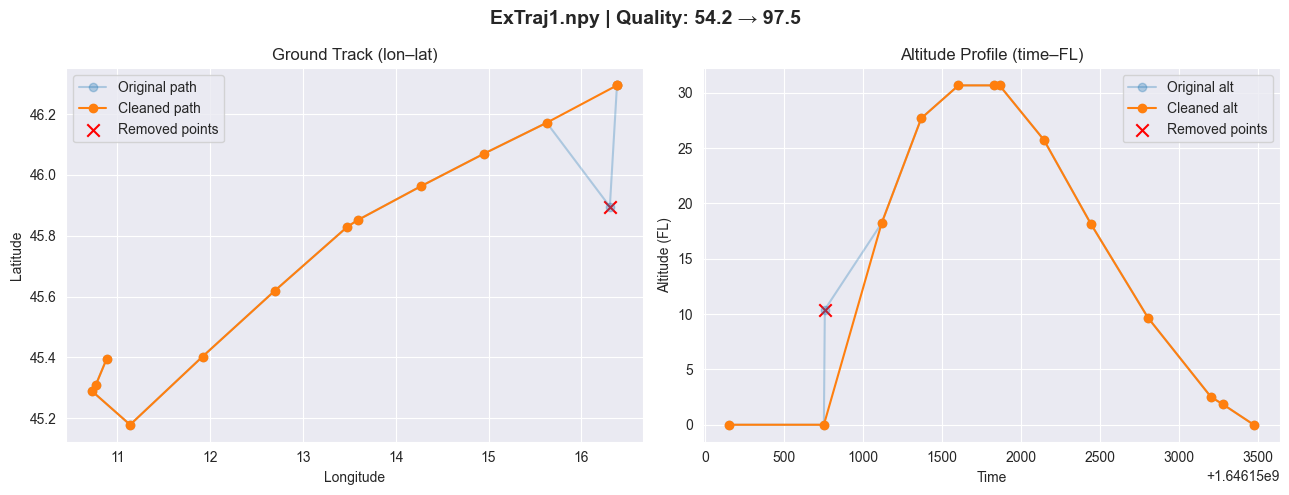


=== Processing C:\Users\Lenovo\Downloads\ExTraj2.npy ===
Original trajectory shape: (14, 4)
Cleaned trajectory shape: (13, 4)
Universal quality score (before): 50.59
Universal quality score (after):  94.37


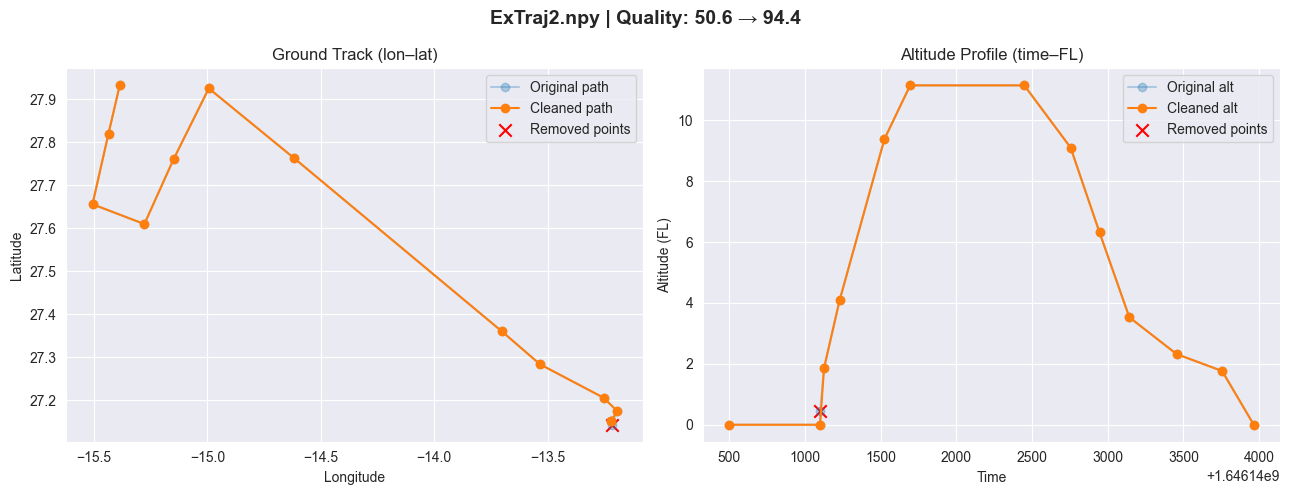

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from trajectory_tools import (
    estimate_quality_universal,
    optimize_trajectory_aggressive,
)

files = [
    r'C:\Users\Lenovo\Downloads\ExTraj1.npy',
    r'C:\Users\Lenovo\Downloads\ExTraj2.npy'
]

for path in files:
    print(f"\n=== Processing {path} ===")
    traj = np.load(path, allow_pickle=True)

    if isinstance(traj, np.ndarray) and traj.dtype == object:
        traj = traj[0]

    traj = np.array(traj)
    print("Original trajectory shape:", traj.shape)

    # Quality BEFORE cleaning
    score_before = estimate_quality_universal(traj)

    # Clean trajectory
    traj_clean = optimize_trajectory_aggressive(traj)
    print("Cleaned trajectory shape:", traj_clean.shape)

    # Quality AFTER cleaning
    score_after = estimate_quality_universal(traj_clean)

    print(f"Universal quality score (before): {score_before:.2f}")
    print(f"Universal quality score (after):  {score_after:.2f}")

    t_orig  = traj[:, 0]
    lat_o   = traj[:, 1]
    lon_o   = traj[:, 2]
    alt_o   = traj[:, 3]

    t_clean = traj_clean[:, 0]
    lat_c   = traj_clean[:, 1]
    lon_c   = traj_clean[:, 2]
    alt_c   = traj_clean[:, 3]

    comparison = (traj[:, None, :] == traj_clean[None, :, :]).all(axis=2)
    kept_mask = comparison.any(axis=1)
    removed_mask = ~kept_mask

    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    fig.suptitle(
        f"{Path(path).name} | Quality: {score_before:.1f} → {score_after:.1f}",
        fontsize=14,
        fontweight="bold"
    )

    # 1) Ground track: lon vs lat
    ax = axes[0]
    # Original path (light)
    ax.plot(lon_o, lat_o, marker='o', linestyle='-', alpha=0.3, label='Original path')
    # Cleaned path
    ax.plot(lon_c, lat_c, marker='o', linestyle='-', label='Cleaned path')
    # Removed points
    ax.scatter(lon_o[removed_mask], lat_o[removed_mask], marker='x', s=80, color='red', label='Removed points')

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Ground Track (lon–lat)')
    ax.legend()
    ax.grid(True)

    # 2) Altitude vs Time
    ax = axes[1]
    # Original
    ax.plot(t_orig, alt_o, marker='o', linestyle='-', alpha=0.3, label='Original alt')
    # Cleaned
    ax.plot(t_clean, alt_c, marker='o', linestyle='-', label='Cleaned alt')
    # Removed
    ax.scatter(t_orig[removed_mask], alt_o[removed_mask], marker='x', s=80, color='red', label='Removed points')

    ax.set_xlabel('Time')
    ax.set_ylabel('Altitude (FL)')
    ax.set_title('Altitude Profile (time–FL)')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()